# Test run: Dot superconductor Dot system
This Notebook shows how to set up a Dot - Superconductor - Dot system, solve it, and classify the resulting solutions

In [1]:
try:
    import nqcpfem
except ModuleNotFoundError as err:
    import sys
        # put path to nqcpfem module here   
    src_path = '/mnt/c/Users/olisc/NQCP/NQCP_FEM/'
    sys.path.append(src_path)
    import nqcpfem
import sympy
sympy.init_printing(use_latex='mathjax')
import IPython.display as disp
from matplotlib import pyplot as plt
import numpy as np
import os

import logging
logging.getLogger().setLevel(logging.DEBUG)

E0 = 1/(nqcpfem.UNIT_CONVENTION['J to eV']*100000) # unit_scale: 10muev

## Model Setup

In [2]:
from nqcpfem.band_model import LuttingerKohnHamiltonian,FreeBoson,FreeFermion
from nqcpfem.functions import SymbolicFunction
H=FreeFermion(spatial_dim=2).material_spec('Ge')#.add_z_confinement(1,'box',25e-9)
H = LuttingerKohnHamiltonian(spatial_dim=3).material_spec('Ge').add_z_confinement(1,'box',25e-9)
H.BdG_extension()
H.add_zeeman_term(B=[0,0,4e-3])

from nqcpfem.solvers import PETScSolver
solver = PETScSolver(k=12,sigma=0,which='SM')


#H.add_potential(-sympy.symbols('\mu'))

from nqcpfem.envelope_function import RectangleDomain
domain =RectangleDomain(200e-9,100e-9,0)
domain.resolution = [100,50]
from nqcpfem.fenics import FEniCsModel
model = FEniCsModel(H,domain,0,('CG',1))

In [3]:
from nqcpfem.systems.dot_sc_dot import *
model = FEniCsModel(H,None, boundary_condition=0,function_class=('CG',1))
ldot = Dot(-(75e-9+400e-9/2),4e11,0,150e-9,4e11,0,150e-9,)
#rdot = Dot(50e-9,0e12,0,20e-9,1e12,0,20e-9,)
#rdot = Dot(100e-9,10e11,0,50e-9,10e11,0,30e-9,)
barr = Barrier(0e-9,0.5/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
#rbarr = Barrier(15e-9,3/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
sc = Superconductor(0.1/(nqcpfem.UNIT_CONVENTION['J to eV']*1000),400e-9,50e-9,0,5/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
syst = DotSCDot(model,ldot,barr,sc,domain_resolution=[100,100])

mu,mu_sc = sympy.symbols('\mu,\mu_{sc}')
chemical_potential = SymbolicFunction(sympy.Piecewise((-mu_sc,syst.domains['sc_in']),(-mu,True)),'\mu(x)')
H.add_potential(chemical_potential)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


DEBUG:nqcpfem.band_model:finding eigenvalues
DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{\gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28a9ce740>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2bef32bf0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2bef32d40>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2a814f970>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1f970>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1da20>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1fbe0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1f6a0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1ec50>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1e0b0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at

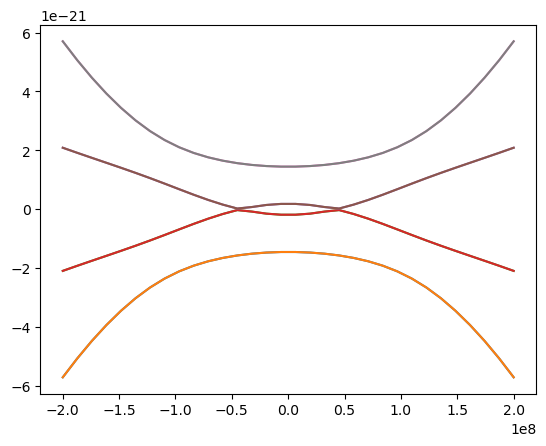

In [46]:
plt.plot(*H.spectrum((-2e8,2e8),[1,0],32,position=(-(75e-9 + 400e-9/2),0,0)))

In [54]:

H.parameter_dict[sympy.symbols('\mu')] = 412*E0#406*E0
H.parameter_dict[sympy.symbols('\mu_{sc}')] = 1000*E0#700*E0
#_x,_y = H.spectrum((-2e8,2e8),[1,0],64,position=(175e-9,0,0))
#plt.plot(_x,_y/E0)

In [55]:
mu_R = sympy.symbols('\mu_R')
R_detuning = sympy.Piecewise((-mu_R,syst.domains['rd_in']),(0,True))
H.add_potential(SymbolicFunction(R_detuning,'\mu_{d}(x)'))

In [56]:
H.parameter_dict[mu_R] = 0*E0

In [57]:
sol=solver.solve(syst.envelope_model)

DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa04e80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa073d0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa04b50>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa07250>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e86364a0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e70c6470>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e70c4400>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e70c62f0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e70c60b0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb2e70c42e0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb28aa1ed10>, c_{44}: <nqcpfem.updatable_object.I

DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{\gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed83d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed8100>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed9d50>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289edbf40>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed8760>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289eda8c0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed9bd0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed93c0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289ed84c0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289edbca0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fb289edb130>, c_{44}: <nqcpfem.updatable_

1.1306675851480895e-21


DEBUG:nqcpfem.fenics:computing ufl_form


1.1302372266308974e-21


INFO:root:running build_ext
INFO:root:building 'libffcx_forms_c493380587cd5c93089cab6c8d243d2828f0946d' extension
INFO:root:/home/oliver/miniconda3/envs/Germanium_Spins_FE/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/lib/python3.10/site-packages/ffcx/codegeneration -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/include/python3.10 -c libffcx_forms_c493380587cd5c93089cab6c8d243d2828f0946d.c -o ./libffcx_forms_c493380587cd5c93089cab6c8d243d2828f0946d.o -O2 -g0
INFO

In [58]:
print(sol[0]/E0)
from nqcpfem.observables import band_angular_momentum,particle_projector

AM = band_angular_momentum(H)
for ev in sol[1]:
    print(AM.mel(ev)[-1]/nqcpfem._hbar)

[  3.51187595  -3.51187595  -3.99981547   3.99981547   4.93269905
  -4.93269905  -5.41973106   5.41973106 -13.69066626  13.69066626
 -14.0606934   14.0606934 ]
1.4767930299043712
1.4767930299045762
-1.476760213670079
-1.4767602136703188
1.4578530492641717
1.4578530492641086
-1.4577817912616495
-1.4577817912617936
-0.8538630261079677
-0.8538630261087208
0.8533076997386901
0.8533076997335158


INFO:aiohttp.access:127.0.0.1 [26/Aug/2023:16:13:52 +0000] "GET /__trame_vuetify/fonts/roboto-latin-400.1e2d4d3a.woff2 HTTP/1.1" 200 239 "http://localhost:39747/__trame_vuetify/trame-vuetify.css" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Code/1.81.1 Chrome/108.0.5359.215 Electron/22.3.18 Safari/537.36"


In [59]:
from nqcpfem.plotting import plot_eigenvector,plot_function
p_proj = particle_projector(H)
AM = band_angular_momentum(H)
I = 0
plot_eigenvector(sol[1][I],syst.envelope_model)
print(AM.mel(sol[1][1])/nqcpfem._hbar)
print(p_proj.mel(sol[1][I]))


DEBUG:pyvista.trame.jupyter:http://localhost:39747/index.html?ui=P_0x7fb289d211e0_9&reconnect=auto


Widget(value="<iframe src='http://localhost:39747/index.html?ui=P_0x7fb289d211e0_9&reconnect=auto' style='widt…

[ 1.08542868e-12 -9.47309829e-14  1.47679303e+00]
0.0031584779360139064


In [11]:
list(H.parameter_dict.items())

[(\gamma_{1}, 13.38), (\gamma_{3}, 5.69), (m, 9.1093837015e-31), (\gamma_{2}, 
4.24), (\Delta_{0}, 0.296), (κ, 3.41), (q, 0.06), (D_{u}, 3.3195), (D'_{u}, 5.
7158), (c_{11}, 12.4), (c_{12}, 4.13), (c_{44}, 6.83), (a, 5.65791), (\epsilon
, 16.5), (q_{c}, 1.60217663e-19), (l_z, 2.5e-08), (\mu, 6.408706536e-22), (\mu
_{sc}, 0.0), (\mu_R, 1.7623942974e-23)]

In [12]:
from nqcpfem.systems import DefiniteTensorComponent

# spin down state only
hh_mask = np.array([1,0,0,0,0,0,0,0]).reshape(8,1)
HH_subsp = DefiniteTensorComponent(hh_mask,'HH_subsp')

aa_mask = np.array([0,0,0,0,1,1,1,1]).reshape(8,1)
AA_subsp = DefiniteTensorComponent(aa_mask,'AA_subsp')


ld_state,rd_state,sc_state = syst.__make_system_classes__()

hh_ld = HH_subsp.combine_state_cls(ld_state)
hh_rd = HH_subsp.combine_state_cls(rd_state)
hh_sc = HH_subsp.combine_state_cls(sc_state)

aa_rd = rd_state.combine_state_cls(AA_subsp)



In [13]:

X_arr =syst.envelope_model.positional_rep(sol[1][0])[1]
subspace=syst.select_subspace((hh_ld,aa_rd),sol[1],2,x_points=X_arr)

for i in subspace:
    print(i,AM.mel(sol[1][i])/nqcpfem._hbar,p_proj.mel(sol[1][i]))
    
(sol[0][subspace[0]]-sol[0][subspace[1]])/E0


4 [ 7.10339686e-18 -1.92510342e-16 -1.49753929e+00] 2.7879638862667925e-28
6 [-1.21624310e-17  2.23419295e-16  1.49753644e+00] 1.0661633725847355e-28


0.4916762379622865

In [14]:
if True:
    plot_eigenvector(sol[1][subspace[0]],syst.envelope_model)

DEBUG:pyvista.trame.jupyter:http://localhost:41221/index.html?ui=P_0x7f05feece6e0_1&reconnect=auto


Widget(value="<iframe src='http://localhost:41221/index.html?ui=P_0x7f05feece6e0_1&reconnect=auto' style='widt…

In [3]:
from nqcpfem.band_model import LuttingerKohnHamiltonian,FreeBoson,FreeFermion
from nqcpfem.functions import SymbolicFunction
H=FreeFermion(spatial_dim=2).material_spec('Ge')#.add_z_confinement(1,'box',25e-9)
H = LuttingerKohnHamiltonian(spatial_dim=3).material_spec('Ge').add_z_confinement(1,'box',25e-9)
H.BdG_extension()
H.add_zeeman_term(B=[0,0,1e-1])
from nqcpfem.solvers import PETScSolver
solver = PETScSolver(k=12,sigma=0,which='SM')


#H.add_potential(-sympy.symbols('\mu'))

from nqcpfem.envelope_function import RectangleDomain
domain =RectangleDomain(200e-9,100e-9,0)
domain.resolution = [100,50]
from nqcpfem.fenics import FEniCsModel

from nqcpfem.systems.dot_sc_dot import *
model = FEniCsModel(H,None, boundary_condition=0,function_class=('CG',1))
ldot = Dot(-175e-9,4e11,0,150e-9,4e11,0,150e-9,)
#rdot = Dot(50e-9,0e12,0,20e-9,1e12,0,20e-9,)
#rdot = Dot(100e-9,10e11,0,50e-9,10e11,0,30e-9,)
barr = Barrier(0e-9,0/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
#rbarr = Barrier(15e-9,3/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
sc = Superconductor(0.1/(nqcpfem.UNIT_CONVENTION['J to eV']*1000),200e-9,50e-9,0,5/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
syst = DotSCDot(model,ldot,barr,sc,domain_resolution=[100,100])

mu,mu_sc = sympy.symbols('\mu,\mu_{sc}')
chemical_potential = SymbolicFunction(sympy.Piecewise((-mu_sc,syst.domains['sc_in']),(-mu,True)),'\mu(x)')
H.add_potential(chemical_potential)

H.parameter_dict[sympy.symbols('\mu')] = 0#412*E0
H.parameter_dict[sympy.symbols('\mu_{sc}')] = 700*E0


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
mu_R = sympy.Symbol('\mu_{R}')
#H.add_potential(SymbolicFunction(sympy.Piecewise((-mu_R,syst.domains['rd_in']),(0,True)),'\mu_{R}(x)'))

In [6]:
#H.parameter_dict[mu_R] = 0

In [7]:
from nqcpfem.systems import DefiniteTensorComponent
hh_p = DefiniteTensorComponent(np.array([1,0,0,0,0,0,0,0]).reshape(8,1),'hh_particle')
hh_ap = DefiniteTensorComponent(np.array([0,0,0,0,0,0,0,1]).reshape(8,1),'hh_anti_particle')
hh_ld = syst.__make_system_classes__()[0].combine_state_cls(hh_p)
hh_rd = syst.__make_system_classes__()[1].combine_state_cls(hh_ap)

In [9]:
syst.find_avoided_crossing(solver,(hh_ld,hh_rd),(mu_R,),{mu_R:(-50*E0,50*E0)})

KeyError: \mu_{R}

In [24]:
R=-1.9747097813821572e-23

In [4]:

minimizations = syst.determine_all_couplings(0,3,solver,412*E0,(-50*E0,50*E0))

DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756950>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756980>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92757c10>, c_{44}: <nqcpfem.updatable_object.I

9.884028235959503e-22


DEBUG:nqcpfem.fenics:computing ufl_form


9.88840372666347e-22


INFO:root:running build_ext
INFO:root:building 'libffcx_forms_6afe856bf71ad564569070d929169f08b2bd200d' extension
INFO:root:/home/oliver/miniconda3/envs/Germanium_Spins_FE/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/lib/python3.10/site-packages/ffcx/codegeneration -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/include/python3.10 -c libffcx_forms_6afe856bf71ad564569070d929169f08b2bd200d.c -o ./libffcx_forms_6afe856bf71ad564569070d929169f08b2bd200d.o -O2 -g0
INFO

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 100.0
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 423.80339887498945}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttr

 
 Func-count     x          f(x)          Procedure
    1       -23.6068          100        initial


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80928910>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092aad0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80928ee0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80928b50>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80929690>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80929bd0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b340>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b190>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80929660>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b130>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b160>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 100.28042410544404
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 385.60679774997897}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    2        23.6068       100.28        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0ae00>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096e770>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d870>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f190>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d05990>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9f9d0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9faf0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bef4c0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bef3a0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bec8e0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bee7d0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 212.44433517560526
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 411.97060889066097}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    3       -52.7864      212.444        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096ed40>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096e620>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096e5f0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096da20>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f9a0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d480>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096dc60>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f940>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096db40>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d5a0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096ec80>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 16.981092420758618
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 411.9900493446813}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    4     -0.0587822      16.9811        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5ed0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4940>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7490>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4b50>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb54b0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7220>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5840>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4400>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4d60>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5420>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7b50>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 16.976445619366174
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 412.1872401146623}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    5     -0.0199013      16.9764        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6620>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7df0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7790>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6320>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4e20>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5270>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb79a0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4ca0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4670>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6830>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7280>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 17.017383064476594
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 412.0653695165463}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    6        0.37448      17.0174        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096ed70>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f610>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096eb30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f730>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096e5c0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096fd30>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096ed40>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d8a0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f490>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096f190>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d3c0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 16.973160924084212
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 412.0382829104232}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    7       0.130739      16.9732        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5ed0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb45b0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb50c0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4940>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5db0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6da0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6ef0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb5210>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb7f40>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb73a0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 16.971646622249676
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 412.0216162431887}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    8      0.0765658      16.9716        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9b340>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d98e50>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d995a0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d999f0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9b0d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9b730>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d98040>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9bf40>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9b760>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9a470>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d99480>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 16.972219575009056
INFO:nqcpfem.parameter_search:minimization successful with final value:
 3.1279043919626353e-24
 achieved for arguments:
 {\mu_{R}: 6.601581091925616e-22}
INFO:nqcpfem.parameter_search:starting minimization with
 x0:(0,),
 bounds: ((-100, 100),)
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 395.6963606077258}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_obje

    9      0.0432325      16.9722        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.1 )
[6.41185643e-22 6.79007903e-22 6.17810201e-22 6.60049683e-22
 6.60080831e-22 6.60396765e-22 6.60201507e-22 6.60158109e-22
 6.60131406e-22] [1.21830836e-24 3.81468633e-23 1.96454122e-23 1.96763442e-23
 1.96763435e-23 2.27884561e-23 2.27801486e-23 2.27798413e-23
 1.96763395e-23]
[-4.22865719e-23  3.46330398e-26]


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781f60>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807815d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782ad0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807835b0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780e20>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807837c0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782470>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782650>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782770>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807800d0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782b90>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 100.0
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.9320533854419}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttri

 
 Func-count     x          f(x)          Procedure
    1       -23.6068          100        initial


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4a770>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d48040>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4be50>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4d30>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb4550>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bef7c0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bee2f0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bed150>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88beef50>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88bedff0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88becf40>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 69.72857533993029
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 405.78592346547265}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    2        23.6068      69.7286        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4b2e0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d499f0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d495d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49330>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4add0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4bb20>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d48af0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4b5b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4a200>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4af50>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d48b80>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 173.36730347937345
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.58562982104536}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    3        52.7864      173.367        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78dc0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79d20>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c796f0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a290>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79390>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7af80>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c793f0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79840>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a0b0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79810>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a860>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 5.6554881973159254
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.1077375744759}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    4        5.84083      5.65549        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70070>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c71390>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c71690>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c709d0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c73dc0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70520>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c717e0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88cb6200>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d994e0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d985e0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9a050>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 7.384351567373328
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.51188477270574}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    5        2.22247      7.38435        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d48040>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49a50>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d494b0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49630>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d484c0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49cc0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4baf0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da9e70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da9960>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88daada0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da8310>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 3.642687470838006
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.37033292474626}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    6        5.28247      3.64269        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7ad10>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79ff0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a3b0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78820>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78f40>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7af80>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7ace0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7bf40>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79060>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c789a0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7b820>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.2202755541450241
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.2700304262307}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    7        4.21071     0.220276        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a4a0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a0b0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a710>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78340>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a470>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7bbb0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a7d0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a170>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78d30>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78580>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a080>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 2.957060168229228
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.384296251602}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Indep

    8        3.45127      2.95706        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d933d0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d932b0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d91720>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d91d80>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d90040>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d93be0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d93550>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d905e0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d93400>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d90520>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d90cd0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.1607505954348156
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.38869872980666}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    9        4.31644     0.160751        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780fa0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807817e0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781bd0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781150>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807804f0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807814e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781600>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783250>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781d20>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780c10>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782c50>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.28088541124062905
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.3798937733974}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

   10        4.34977     0.280885        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781870>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807823b0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783b20>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781300>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780310>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782ce0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782cb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781ae0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807810f0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780c40>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783100>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.04061654642484137
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 399.37549129525803}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.I

   11         4.2831    0.0406165        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d04310>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a949d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a94130>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a95c60>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a96d10>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a942e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a943d0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a95b40>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a94490>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a95240>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a94a30>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.07951673173346593
INFO:nqcpfem.parameter_search:minimization successful with final value:
 2.2152711048570296e-27
 achieved for arguments:
 {\mu_{R}: 6.398771338931393e-22}
INFO:nqcpfem.parameter_search:starting minimization with
 x0:(0,),
 bounds: ((-100, 100),)
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 414.6643579750022}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_obj

   12        4.24977    0.0795167        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.1 )
[6.41185643e-22 6.79007903e-22 6.17810201e-22 6.60049683e-22
 6.60080831e-22 6.60396765e-22 6.60201507e-22 6.60158109e-22
 6.60131406e-22 6.33975463e-22 6.43966144e-22 6.50140725e-22
 6.40206759e-22 6.39441092e-22 6.40088607e-22 6.39861816e-22
 6.39701113e-22 6.39884187e-22 6.39891241e-22 6.39877134e-22
 6.39870080e-22] [2.13683817e-23 1.53142708e-23 4.21464518e-23 6.19445934e-24
 6.16354178e-24 2.72977460e-24 2.91827400e-24 2.96016390e-24
 6.11394817e-24 2.79772551e-23 1.83335729e-23 1.26788485e-23
 2.22312096e-23 2.29279008e-23 2.23379612e-23 2.25437576e-23
 2.26901725e-23 2.25234108e-23 2.25169976e-23 2.25298249e-23
 2.25362400e-23]


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a920>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7bdc0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a0b0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78bb0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a380>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a590>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78a00>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c780a0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a230>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7b5b0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78250>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 100.0
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 417.43533082548305}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttr

 
 Func-count     x          f(x)          Procedure
    1       -23.6068          100        initial


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d99d50>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d983a0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d99990>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4d8a0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4da50>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4de40>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4db70>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4f940>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4d0f0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4dc00>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4fd30>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 488.256149339486
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 412.9518025715019}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Indep

    2        23.6068      488.256        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09ea0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09ab0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0b580>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0b1c0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e8f880>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e8f8b0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e2a950>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4a410>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4e380>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4d780>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 139.49635587576083
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 414.1249202331745}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    3       -52.7864      139.496        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808292d0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80828c70>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082bc10>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082bfd0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80828220>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808283d0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082b670>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082ace0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808284f0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082a9e0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8082ba30>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 24.512948472502135
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.89107262574396}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    4       -32.7981      24.5129        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09840>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09bd0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09cc0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c097b0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0a050>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0b760>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0b1c0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09ae0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c0aa70>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c09f00>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e74550>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 8.198139076849197
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.6235735243657}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Inde

    5       -36.7825      8.19814        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4db70>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4d420>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4d930>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4da50>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4d5d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4c6d0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4f130>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4e380>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e299c0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e29f90>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8096d1e0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 45.606234159805055
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.924562272472}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Inde

    6       -41.3403      45.6062        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ff3fa0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092a4a0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80928eb0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80929f60>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092add0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092aa10>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092a140>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b0a0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092ace0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092b160>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8092a860>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 3.5140379712162026
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.9746565524062}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    7       -36.2119      3.51404        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6e680>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f9d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6fc70>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4f0d0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4f5e0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4d6c0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808b6830>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808b4940>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808b65c0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef808b50f0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80a94af0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 3.492821346453114
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 414.03205217118506}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    8       -35.3584      3.49282        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6e260>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6c220>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f3d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6c070>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6e4d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6c9a0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6ded0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6d7b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6ceb0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6efb0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f250>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 11.521404100152116
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.9497363477135}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    9       -34.3804      11.5214        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2260>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2050>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f21d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f11b0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2080>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f1390>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f0850>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2fe0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f06d0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f0250>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f1240>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.007099482187588638
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.94777997833745}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.

   10        -35.783   0.00709948        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4af50>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4ad70>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49360>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d487f0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49c30>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4aef0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4a650>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d49120>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4a860>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4b760>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d4b520>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.2665443917744573
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.9552982920091}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

   11       -35.8163     0.266544        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4e290>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4fc10>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4e740>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4fc40>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4dc30>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e4ed70>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d05fc0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d04820>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d06500>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d05e70>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d066e0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.7850702171716006
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 413.9518608213909}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

   12       -35.6882      0.78507        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da3550>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da3b80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88da1e40>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f130>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6d8a0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6fd90>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6eb00>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6c640>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f190>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6ceb0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6f9a0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 0.3042573128638042
INFO:nqcpfem.parameter_search:minimization successful with final value:
 7.870074337585997e-29
 achieved for arguments:
 {\mu_{R}: 6.63220595226767e-22}
INFO:nqcpfem.parameter_search:starting minimization with
 x0:(0,),
 bounds: ((-100, 100),)
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 400.4469924894626}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object

   13       -35.7468     0.304257        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.1 )
[6.41185643e-22 6.79007903e-22 6.17810201e-22 6.60049683e-22
 6.60080831e-22 6.60396765e-22 6.60201507e-22 6.60158109e-22
 6.60131406e-22 6.33975463e-22 6.43966144e-22 6.50140725e-22
 6.40206759e-22 6.39441092e-22 6.40088607e-22 6.39861816e-22
 6.39701113e-22 6.39884187e-22 6.39891241e-22 6.39877134e-22
 6.39870080e-22 6.64365545e-22 6.68805133e-22 6.61621729e-22
 6.63501271e-22 6.63126606e-22 6.62698025e-22 6.63180262e-22
 6.63260522e-22 6.63352480e-22 6.63220595e-22 6.63217461e-22
 6.63229506e-22 6.63223999e-22] [1.71989700e-24 3.49792751e-23 2.26379985e-23 1.34818849e-23
 1.35128017e-23 1.69223478e-23 1.67336912e-23 1.66917730e-23
 1.35623913e-23 8.34958077e-24 1.31838476e-24 6.98273953e-24
 2.58547133e-24 3.28414066e-24 2.69253158e-24 2.89891546e-24
 3.04574426e-24 2.87851090e-24 2.87207952e-24 2.88494322e-24
 2.89137647e-

DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2c20>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f1ab0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2260>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f2ec0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f1210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809f0760>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807822c0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80781120>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807836a0>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80782bf0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80780940>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 100.0
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.76645250996995}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttr

 
 Func-count     x          f(x)          Procedure
    1       -23.6068          100        initial


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7af50>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79450>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7bbb0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a2c0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78d90>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c78af0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79330>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7b250>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c7a440>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c785b0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79db0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 80.68967508234863
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 402.5819236494401}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Inde

    2        23.6068      80.6897        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9ccd0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9d9f0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca3640>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0ca0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca26b0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca32b0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0880>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca3e50>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e8e230>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e8fe50>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e8f730>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 159.12977219053423
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.2476869977677}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    3        52.7864       159.13        golden


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fe200>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fd6f0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809ffa00>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fcfa0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fd240>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fd090>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fd960>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fdfc0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fe020>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809ff790>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fe0b0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 53.800177501253074
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.1948706821189}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    4        5.04406      53.8002        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c73b20>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70190>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c700a0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c735e0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c715a0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70af0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c73070>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fdc90>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809ffe50>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef809fdae0>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 53.753902628883395
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.21636503840307}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.In

    5        3.15416      53.7539        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d923e0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d907f0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d93010>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e3ae90>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e385b0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e388e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e3b3a0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e38be0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e3ac50>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e3a6b0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88e39840>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 53.697466430341336
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.2173604496449}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    6        3.92329      53.6975        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6ed10>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6dcf0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6c100>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6e350>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d6da80>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c948b0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c94040>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c94ac0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8078d240>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8078cc70>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8078d120>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 53.69735600929961
DEBUG:nqcpfem.parameter_search:evaluating function with x={\mu_{R}: 401.21829200500935}
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774730>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927746d0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774670>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92774640>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92776800>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927568f0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef92756e90>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef927569b0>, D'_{u}: <nqcpfem.updatable_object.Ind

    7         3.9589      53.6974        parabolic


DEBUG:nqcpfem.band_model:building numerical array with var_dict: 
{m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c72bf0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c738e0>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70ca0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c737c0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c732b0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c72c20>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c70460>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c739d0>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c73c70>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4f8b0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c4f100>, c_{44}: <nqcpfem.updatable_

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
DEBUG:nqcpfem.parameter_search:result: 53.697453510538104
INFO:nqcpfem.parameter_search:minimization successful with final value:
 7.4495216194975565e-25
 achieved for arguments:
 {\mu_{R}: 6.428210800675768e-22}


    8        3.99224      53.6975        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.1 )


In [12]:
minimizations[0]

     fun: 3.1279043919626353e-24
 message: 'Solution found.'
    nfev: 9
     nit: 9
  status: 0
 success: True
       x: {\mu_{R}: 6.601581091925616e-22}

In [39]:
import pickle as pkl
with open('minisave.save','wb') as f:
    pass
    pkl.dump(minimizations,f)

In [38]:
minimizations[0]

     fun: 3.1279043919626353e-24
    func: None
 message: 'Solution found.'
    nfev: 9
     nit: 9
  status: 0
 success: True
       x: {\mu_{R}: 6.601581091925616e-22}

In [21]:
X[2].fun/E0#[sympy.Symbol('\mu_{L}')]/E0

#H.parameter_dict['\mu_{L}']

TypeError: 'Symbol' object is not subscriptable

In [22]:
X[3].minimization_func.results_log
muL = list(X[0].minimization_func.results_log[0][0].keys())[0]

converter = lambda x: ([l[0][muL] for l in x.minimization_func.results_log],[l[1] for l in x.minimization_func.results_log])

_x,_y = converter(X[3])

plt.scatter(np.array(_x)/E0,np.array(_y)/E0)



TypeError: 'Symbol' object is not subscriptable

In [ ]:
eps = sympy.Symbol('V_{eps}')
detuning = SymbolicFunction(sympy.Piecewise((eps,syst.domains['ld_in']),(-eps,syst.domains['rd_in']),(0,True)),'V_{detuning}(x)')
detuning.expression
H.add_potential(detuning)
H.parameter_dict[eps] = 0*E0

#detuning2 = SymbolicFunction(sympy.Piecewise((1*muev,syst.domains['ld_in']),(-1*muev,syst.domains['rd_in']),(0,True)),'V_{detuning_fix}(x)')
#H.add_potential(detuning2)

In [34]:
minimum = syst.find_avoided_crossing(solver,(hh_ld,hh_rd),(eps,),{eps:(-50*E0,50*E0)})

NameError: name 'eps' is not defined

In [38]:
1.4901161193847656e-08/E0

9300573281140272.0

In [ ]:
2.796997131534238e-24/muev

In [18]:
from nqcpfem.band_model import LuttingerKohnHamiltonian,FreeBoson,FreeFermion
from nqcpfem.functions import SymbolicFunction
H=FreeFermion(spatial_dim=2).material_spec('Ge')#.add_z_confinement(1,'box',25e-9)
H = LuttingerKohnHamiltonian(spatial_dim=3).material_spec('Ge').add_z_confinement(1,'box',25e-9)
H.BdG_extension()
H.add_zeeman_term(B=[0,0,1e-1])
from nqcpfem.solvers import PETScSolver
solver = PETScSolver(k=12,sigma=0,which='SM')


from nqcpfem.systems import PositionalState,DefiniteTensorComponent
#H.add_potential(-sympy.symbols('\mu'))

from nqcpfem.envelope_function import RectangleDomain
domain =RectangleDomain(200e-9,100e-9,0)
domain.resolution = [100,50]
from nqcpfem.fenics import FEniCsModel

from nqcpfem.systems.dot_sc_dot import *
model = FEniCsModel(H,None, boundary_condition=0,function_class=('CG',1))
ldot = Dot(-175e-9,4e11,0,150e-9,4e11,0,150e-9,)
#rdot = Dot(50e-9,0e12,0,20e-9,1e12,0,20e-9,)
#rdot = Dot(100e-9,10e11,0,50e-9,10e11,0,30e-9,)
barr = Barrier(0e-9,0/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
#rbarr = Barrier(15e-9,3/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
sc = Superconductor(0.1/(nqcpfem.UNIT_CONVENTION['J to eV']*1000),200e-9,50e-9,0,5/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
syst = DotSCDot(model,ldot,barr,sc,domain_resolution=[100,100])

mu,mu_sc = sympy.symbols('\mu,\mu_{sc}')
chemical_potential = SymbolicFunction(sympy.Piecewise((-mu_sc,syst.domains['sc_in']),(0,True)),'\mu(x)')
H.add_potential(chemical_potential)

H.parameter_dict[sympy.symbols('\mu_{sc}')] = 700*E0



In [19]:
mu_R = sympy.symbols('\mu_R')
mu_L = sympy.symbols('\mu_L')
R_detuning = sympy.Piecewise((-mu_R,syst.domains['rd_in']),(-mu_L,syst.domains['ld_in']),(0,True))
H.add_potential(SymbolicFunction(R_detuning,'\mu_{d}(x)'))
H.parameter_dict[mu_R] = 0
H.parameter_dict[mu_L] = 412*E0

In [20]:
def mu_right_shift(mu_R_val):
    H.parameter_dict[mu_R]=mu_R_val
    return syst.envelope_model

from nqcpfem.parameter_search import IterativeModelSolver

mu_right_shifting= IterativeModelSolver(mu_right_shift,solver)


In [66]:
def mu_right_shifting(mu_R_val):
    H.parameter_dict[mu_R] = mu_R_val
    return solver.solve(syst.envelope_model)


In [ ]:
def

In [21]:
mu_sweep_save = 'mu_sweep_IT_high_B_zoom.save'
mu_vals = np.linspace(-25*E0,25*E0,128)
from nqcpfem.parameter_search import ParameterSearch

#search = ParameterSearch(mu_vals,mu_right_shifting,mu_sweep_save)
search = ParameterSearch.load(mu_sweep_save)

In [22]:
search.run()

INFO:nqcpfem.parameter_search:evaluating at grid point 1/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef807807c0>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute o

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.fenics:computing ufl_form
INFO:root:running build_ext
INFO:root:building 'libffcx_forms_611d3be6d05311ce00eab4844400f5ab283187e1' extension
INFO:root:/home/oliver/miniconda3/envs/Germanium_Spins_FE/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/lib/python3.10/site-packages/ffcx/codegeneration -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/include/python3.10 -c libffcx_forms_611d3be6d05311ce00eab4844400f5ab283187e1.c -o ./libffcx_forms_611d3be6d05311c

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 3/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 4/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 5/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 6/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 7/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 8/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 9/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 10/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 11/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 12/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 13/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 14/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 15/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 16/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 17/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 18/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 19/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 20/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 21/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 22/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 23/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 24/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 25/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 26/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 27/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 28/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 29/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 30/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 31/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 32/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 33/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 34/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 35/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 36/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 37/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 38/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 39/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 40/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 41/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 42/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 43/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 44/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 45/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 46/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 47/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 48/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 49/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 50/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 51/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 52/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 53/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 54/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 55/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 56/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 57/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 58/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 59/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 60/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 61/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 62/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 63/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 64/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 65/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 66/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 67/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 68/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 69/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 70/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 71/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 72/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 73/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 74/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 75/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 76/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 77/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 78/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 79/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 80/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 81/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 82/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 83/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 84/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 85/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 86/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 87/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 88/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 89/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 90/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 91/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 92/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 93/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 94/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 95/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 96/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 97/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 98/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 99/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Inde

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 100/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 101/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 102/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 103/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 104/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 105/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 106/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 107/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 108/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 109/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 110/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 111/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 112/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 113/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 114/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 115/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 116/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 117/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 118/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 119/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 120/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 121/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 122/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 123/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 124/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 125/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 126/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 127/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 128/128
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80348ac0>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80349d80>, \gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034ba30>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef8034afe0>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88c79210>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88d9e3e0>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca0bb0>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef88ca1060>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7fef80783520>, c_{11}: <nqcpfem.updatable_object.Ind

9.884028235959503e-22
9.88840372666347e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12


In [88]:
from nqcpfem.systems import DefiniteTensorComponent
hh_up = DefiniteTensorComponent(np.array([1,0,0,0,0,0,0,0]).reshape(8,1),'hhup')
hh_down = DefiniteTensorComponent(np.array([0,0,0,0,1,0,0,0]).reshape(8,1),'hhup')
hh_ld = syst.__make_system_classes__()[0].combine_state_cls(hh_up)
hh_rd = syst.__make_system_classes__()[1].combine_state_cls(hh_down)

In [89]:
YYs = [np.sort(s[0][:12]) for s in search.results]
Ys = []
x = syst.envelope_model.positional_rep(search.results[0][1][0])[1]


In [90]:

Ys = [np.sort(s[0][syst.select_subspace((hh_rd,hh_ld),s[1],2,x_points=x)]) for s in search.results]

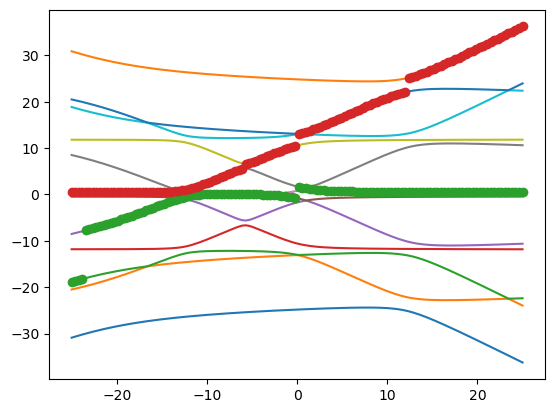

In [91]:
plt.plot(search.parameter_sets/E0,np.array(YYs)/E0)
plt.plot(search.parameter_sets/E0,np.array(Ys)/E0,'o')
#plt.xlim(20,40)
#plt.ylim(-5,5)

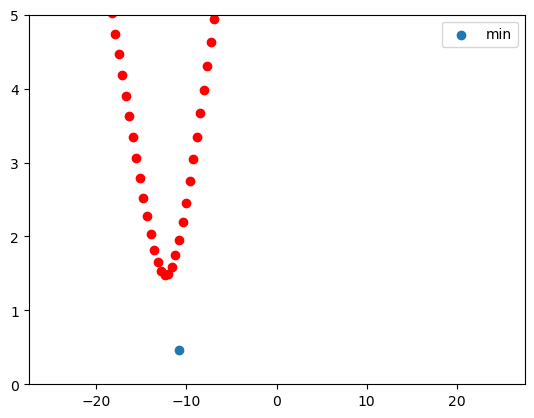

In [94]:
_y = np.array(Ys)/E0
plt.plot(search.parameter_sets/E0,_y[:,1]-_y[:,0],'ro')
_I=3

#plt.axvline(list(minimizations[_I].x.values())[0]/E0-412)

plt.scatter([list(minimizations[_I].x.values())[0]/E0-412],[minimizations[_I].fun/E0],label='min')
#converter = lambda x: ([l[0][muL] for l in x.minimization_func.results_log],[l[1] for l in x.minimization_func.results_log])

#_xx,_yy = converter(minimizations[_I])
#plt.plot(np.array(_xx)/E0-412,np.array(_yy)/E0,'o')
plt.ylim(0,5)
plt.legend()

In [44]:
minimizations[_I].fun/E0

1.9522843646480463

In [34]:
np.array(_yy)/E0


array([21.63599316, 21.63599315, 20.55795321, 20.5579532 , 15.13505353,
       15.13505352, 12.39394426, 12.39394426,  1.47829992,  1.47829992,
        5.43187376,  0.73736536,  0.73736536,  0.40398248,  0.40398247,
        0.23433795,  0.23433795,  0.18665414,  0.18665413,  0.17533698,
        0.17533698,  0.17499934,  0.17499934,  0.17499832,  0.17499832])

In [37]:
np.array(_xx)/E0

array([824.        , 824.00000001, 825.11548662, 825.11548663,
       830.70437336, 830.70437337, 858.80461359, 858.8046136 ,
       844.69049674, 844.69049674, 851.71848812, 846.91765417,
       846.91765418, 845.81619505, 845.81619506, 846.3463354 ,
       846.3463354 , 846.12124736, 846.12124737, 846.19854743,
       846.19854744, 846.18683449, 846.1868345 , 846.18744392,
       846.18744393])

In [ ]:
I=7
vec = hh_ld.project(search.results[0][1][I],x_points=x) +  hh_rd.project(search.results[0][1][I],x_points=x) 
plot_eigenvector(vec,syst.envelope_model)

DEBUG:pyvista.trame.jupyter:http://localhost:41221/index.html?ui=P_0x7f05a457d3c0_10&reconnect=auto


Widget(value="<iframe src='http://localhost:41221/index.html?ui=P_0x7f05a457d3c0_10&reconnect=auto' style='wid…

INFO:root:client 0dde0e33b0ab406eaf17e26b1907b879 disconnected


INFO:root:No more connections, scheduling shutdown
INFO:aiohttp.access:127.0.0.1 [23/Aug/2023:18:44:25 +0000] "GET /ws HTTP/1.1" 101 0 "-" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Code/1.81.1 Chrome/108.0.5359.215 Electron/22.3.18 Safari/537.36"


In [ ]:
stateproj = lambda _x,s: np.linalg.norm(s.project(_x,x_points=x))**2/np.linalg.norm(_x)**2
from nqcpfem.systems import PositionalState

doms = [PositionalState(v,k) for k,v in syst.domains.items()]

hole_mask = np.array([0,0,0,0,1,1,1,1]).reshape(8,1)

hole_state = DefiniteTensorComponent(hole_mask,'hole')
particle_mask = np.array([1,0,0,1,0,0,0,0]).reshape(8,1)
particle_mask = np.array([1,0,0,0,0,0,0,0]).reshape(8,1)
particle_state = DefiniteTensorComponent(particle_mask,'particle')
for i,ss in enumerate(search.results[0][1]):
    print('\n',i)
    print('lr',stateproj(ss,doms[0]),stateproj(ss,doms[1]))
    print('ph:',stateproj(ss,particle_state),stateproj(ss,hole_state))
    proj= (stateproj(ss,hh_ld),stateproj(ss,hh_rd))
    print('hp',stateproj(ss,hh_ld),stateproj(ss,hh_rd))
    print('w',np.linalg.norm(proj)**2)
    print(np.linalg.norm(particle_state.project(doms[0].project(ss,x_points=x)))**2/np.linalg.norm(ss)**2)
    print(stateproj(ss,particle_state.combine_state_cls(doms[0])))
"""
for i,ss in enumerate(search.results[0][1]):
    print(i,search.results[0][0][i]/E0)
    print('ld:',stateproj(ss,ld_state))
    print('rd:',stateproj(ss,rd_state))
    print('rd ap',stateproj(ss,aa_rd))
    print('sc',stateproj(ss,sc_state))
    print('hole',stateproj(ss,hole_state) )
    print('particle',stateproj(ss,particle_state) )
    print('\n')
"""


 0
lr 0.9385619568847622 0.0034688223687808265
ph: 1.1660360961914976e-29 0.9776860202238408
hp 4.6337060075712285e-30 4.6337060075712285e-30
w 4.294246272920339e-59
2.8040420663432786e-30
2.8040420663432786e-30

 1
lr 0.9385619568847775 0.0034688223687800723
ph: 0.9749125135855108 0.022313979776151124
hp 0.274284017519669 0.274284017519669
w 0.1504634445334602
0.9304503566572588
0.9304503566572588

 2
lr 0.9386213676240704 0.0034657396009387022
ph: 0.021665211932277436 0.9776562060705776
hp 0.007994761452586189 0.007994761452586189
w 0.00012783242136751605
0.0069862474621542
0.0069862474621542

 3
lr 0.9386213676240724 0.0034657396009386662
ph: 5.35842194214392e-27 0.022343793929425718
hp 1.509815109107561e-27 1.509815109107561e-27
w 4.559083327378952e-54
5.108650447440583e-27
5.108650447440583e-27

 4
lr 0.11848855651035815 0.081245829147146
ph: 5.832278523923035e-28 0.06551681955534226
hp 2.19505560511774e-28 2.19505560511774e-28
w 9.636538219117614e-56
6.557148692218593e-29
6.5571

"\nfor i,ss in enumerate(search.results[0][1]):\n    print(i,search.results[0][0][i]/E0)\n    print('ld:',stateproj(ss,ld_state))\n    print('rd:',stateproj(ss,rd_state))\n    print('rd ap',stateproj(ss,aa_rd))\n    print('sc',stateproj(ss,sc_state))\n    print('hole',stateproj(ss,hole_state) )\n    print('particle',stateproj(ss,particle_state) )\n    print('\n')\n"

In [70]:
mu_sweep_save = 'mu_constant.save'
mu_vals = [0*E0]*32
from nqcpfem.parameter_search import ParameterSearch

search = ParameterSearch(mu_vals,mu_right_shifting,mu_sweep_save)
#search = ParameterSearch.load(mu_sweep_save)

In [71]:
search.run()

INFO:nqcpfem.parameter_search:evaluating at grid point 1/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e980>, c_{12}: <nqcpfem.updatable_object.IndependentAttribute ob

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.fenics:computing ufl_form
INFO:root:running build_ext
INFO:root:building 'libffcx_forms_3eef28e7f85470daa095f774727e1f4ce192cbe0' extension
INFO:root:/home/oliver/miniconda3/envs/Germanium_Spins_FE/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/oliver/miniconda3/envs/Germanium_Spins_FE/include -fPIC -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/lib/python3.10/site-packages/ffcx/codegeneration -I/home/oliver/miniconda3/envs/Germanium_Spins_FE/include/python3.10 -c libffcx_forms_3eef28e7f85470daa095f774727e1f4ce192cbe0.c -o ./libffcx_forms_3eef28e7f85470d

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 3/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 4/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 5/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 6/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 7/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 8/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 9/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indepe

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 10/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 11/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 12/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 13/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 14/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 15/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 16/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 17/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 18/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 19/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 20/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 21/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 22/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 23/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 24/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 25/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 26/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 27/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 28/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 29/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 30/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 31/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12
INFO:nqcpfem.parameter_search:evaluating at grid point 32/32
DEBUG:nqcpfem.fenics:assembling array ")#with parameters: {\gamma_{1}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a3e0>, m: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d0749390>, \gamma_{2}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074b0d0>, \gamma_{3}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d074a260>, \Delta_{0}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52cecde7d0>, kappa: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066e170>, q: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066c910>, D_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066cc70>, D'_{u}: <nqcpfem.updatable_object.IndependentAttribute object at 0x7f52d066ce50>, c_{11}: <nqcpfem.updatable_object.Indep

9.884028235959507e-22
9.888403726663474e-22


DEBUG:nqcpfem.solvers:solving problem:
DEBUG:nqcpfem.solvers: number of converged eigenvectors: 12


DEBUG:matplotlib.ticker:vmin 5.689329696947725e-15 vmax 2.9983768050109477e-10
DEBUG:matplotlib.ticker:ticklocs array([1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09,
       1.e-08])
DEBUG:matplotlib.ticker:vmin 5.689329696947725e-15 vmax 2.9983768050109477e-10
DEBUG:matplotlib.ticker:ticklocs array([2.e-16, 3.e-16, 4.e-16, 5.e-16, 6.e-16, 7.e-16, 8.e-16, 9.e-16,
       2.e-15, 3.e-15, 4.e-15, 5.e-15, 6.e-15, 7.e-15, 8.e-15, 9.e-15,
       2.e-14, 3.e-14, 4.e-14, 5.e-14, 6.e-14, 7.e-14, 8.e-14, 9.e-14,
       2.e-13, 3.e-13, 4.e-13, 5.e-13, 6.e-13, 7.e-13, 8.e-13, 9.e-13,
       2.e-12, 3.e-12, 4.e-12, 5.e-12, 6.e-12, 7.e-12, 8.e-12, 9.e-12,
       2.e-11, 3.e-11, 4.e-11, 5.e-11, 6.e-11, 7.e-11, 8.e-11, 9.e-11,
       2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10, 8.e-10, 9.e-10,
       2.e-09, 3.e-09, 4.e-09, 5.e-09, 6.e-09, 7.e-09, 8.e-09, 9.e-09,
       2.e-08, 3.e-08, 4.e-08, 5.e-08, 6.e-08, 7.e-08, 8.e-08, 9.e-08])
DEBUG:matplotlib.ticker:vmin 5.689329696947725e-1

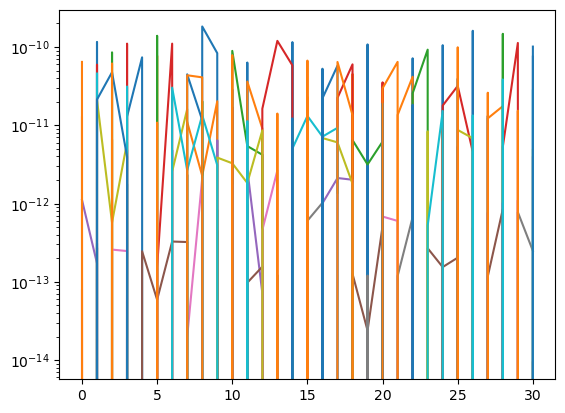

In [76]:
plt.plot(np.diff([np.sort(s[0][:12])/E0 for s in search.results],axis=0))
plt.yscale('log')

In [ ]:
S=np.arange(8*10201).reshape(ss.shape)

In [ ]:
W=np.where(hh_ld.project(S,x_points=x) != particle_state.combine_state_cls(doms[0]).project(S,x_points=x))


In [ ]:
len(W[0])

3465

INFO:aiohttp.access:127.0.0.1 [23/Aug/2023:18:53:28 +0000] "GET /index.html?ui=P_0x7f05feece6e0_1&reconnect=auto HTTP/1.1" 200 236 "-" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Code/1.81.1 Chrome/108.0.5359.215 Electron/22.3.18 Safari/537.36"
INFO:aiohttp.access:127.0.0.1 [23/Aug/2023:18:53:28 +0000] "POST /paraview/ HTTP/1.1" 405 208 "http://localhost:41221/index.html?ui=P_0x7f05feece6e0_1&reconnect=auto" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Code/1.81.1 Chrome/108.0.5359.215 Electron/22.3.18 Safari/537.36"
INFO:root:client 95b455281ae542bd8abd82c99cc10e1e connected
DEBUG:root:wslink incoming msg {'wslink': '1.0', 'id': 'system:c0:0', 'method': 'wslink.hello', 'args': [{'secret': '*****'}], 'kwargs': {}}
DEBUG:root:wslink incoming msg {'wslink': '1.0', 'id': 'rpc:c95b455281ae542bd8abd82c99cc10e1e:0', 'method': 'trame.state.get', 'args': [], 'kwargs': {}}
DEBUG:root:wslink incoming msg {'wslink': '1.0',

In [13]:

mu_sc_vals = np.linspace(500,1000,32)*E0
L_ranges = np.linspace(100,400,32)*1e-9

param_grid = {'mu_sc_val':mu_sc_vals,'lz':L_ranges}

from nqcpfem.systems.dot_sc_dot import *
def coupling_gridsearch(mu_sc_val,lz):
    print(mu_sc_val,lz)
    H = LuttingerKohnHamiltonian(spatial_dim=3).material_spec('Ge').add_z_confinement(1,'box',25e-9)
    H.BdG_extension()
    H.add_zeeman_term(B=[0,0,1e-1])
    from nqcpfem.solvers import PETScSolver
    solver = PETScSolver(k=12,sigma=0,which='SM')
    

    from nqcpfem.systems import PositionalState,DefiniteTensorComponent
    #H.add_potential(-sympy.symbols('\mu'))

    from nqcpfem.envelope_function import RectangleDomain
    domain =RectangleDomain(200e-9,100e-9,0)
    domain.resolution = [100,50]
    from nqcpfem.fenics import FEniCsModel

    model = FEniCsModel(H,None, boundary_condition=0,function_class=('CG',1))
    ldot = Dot(-(76e-9+lz/2),4e11,0,150e-9,4e11,0,150e-9,)
    #rdot = Dot(50e-9,0e12,0,20e-9,1e12,0,20e-9,)
    #rdot = Dot(100e-9,10e11,0,50e-9,10e11,0,30e-9,)
    barr = Barrier(0e-9,0/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
    #rbarr = Barrier(15e-9,3/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
    sc = Superconductor(0.1/(nqcpfem.UNIT_CONVENTION['J to eV']*1000),lz,50e-9,0,5/(nqcpfem.UNIT_CONVENTION['J to eV']*1000))
    syst = DotSCDot(model,ldot,barr,sc,domain_resolution=[400,100])

    mu,mu_sc = sympy.symbols('\mu,\mu_{sc}')
    chemical_potential = SymbolicFunction(sympy.Piecewise((-mu_sc,syst.domains['sc_in']),(-mu,True)),'\mu(x)')
    H.add_potential(chemical_potential)

    H.parameter_dict[mu] = 0*E0
    H.parameter_dict[mu_sc] = mu_sc_val*E0
    
    minimizations = syst.determine_all_couplings(0,3,solver,412*E0,(-50*E0,50*E0))
    return minimizations

In [14]:
from nqcpfem.parameter_search import GridSearch

mu_sc_sweep = GridSearch(param_grid,coupling_gridsearch,'mu_sc_l_sweep.save')

In [ ]:
mu_sc_sweep.run(True,False)

In [17]:
len(mu_sc_sweep.results)

9

In [19]:
mu_sc_sweep.parameters_set[:9]

AttributeError: 'GridSearch' object has no attribute 'parameters_set'

In [36]:
[d['mu_sc_val']/E0 for d in list(mu_sc_sweep.parameter_sets)[:9]]

[500.0, 516.1290322580645, 532.258064516129, 548.3870967741935, 564.5161290322
58, 580.6451612903226, 596.7741935483871, 612.9032258064516, 629.0322580645161
]

In [30]:
vals = np.array([ [v.fun for v in xx] for xx in mu_sc_sweep.results])

DEBUG:matplotlib.ticker:vmin 1.0465060309497182e-08 vmax 0.0011978665485517692
DEBUG:matplotlib.ticker:ticklocs array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01])
DEBUG:matplotlib.ticker:vmin 1.0465060309497182e-08 vmax 0.0011978665485517692
DEBUG:matplotlib.ticker:ticklocs array([2.e-09, 3.e-09, 4.e-09, 5.e-09, 6.e-09, 7.e-09, 8.e-09, 9.e-09,
       2.e-08, 3.e-08, 4.e-08, 5.e-08, 6.e-08, 7.e-08, 8.e-08, 9.e-08,
       2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07, 9.e-07,
       2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01])
DEBUG:matplotlib.ticker:vmin 1.0465060309497182e-

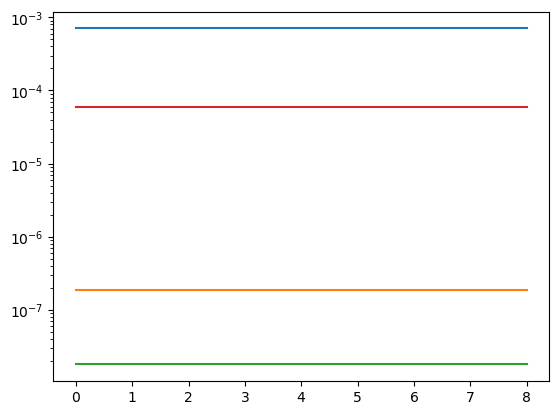

In [34]:
plt.plot(vals/E0)
plt.yscale('log')